In [73]:
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import re
import numpy as np

import get_info
import agd_tools.geo

## France coutours

In [ ]:
# jq '.features[] | select(.properties.name == "France")' zones.json | tr -d ' \t\n\r' > fr
# jq '.geometry.coordinates[2][0]' fr | tr -d ' \t\r\n' > fr2

In [93]:
f = open('/data/projects/opensolarmap/agd_tools/agd_tools/data/fr2')
content = f.read()
l = re.findall(r'([0-9]+.[0-9]+),([0-9]+.[0-9]+)', content)

In [94]:
x = []
y = []
for coo in l:
    a, b = coo
    x.append(float(a))
    y.append(float(b))
x = np.array(x)
y = np.array(y)

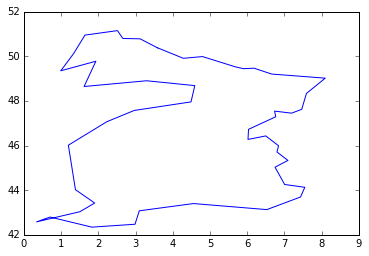

In [95]:
plt.plot(x, y)

In [87]:
x, y = zip(*[agd_tools.geo.geo2carto(lat, lon) for lat, lon in zip(*[x, y])])

In [88]:
pickle.dump([x, y], open('/data/projects/opensolarmap/agd_tools/agd_tools/data/france.pkl', 'wb'))

## Buildings location

In [2]:
ident_list = get_info.get_available_ident()

In [3]:
centers = get_info.get_center(ident_list)

In [6]:
coords = [c for ident, c in centers.items()]

In [89]:
x_fr, y_fr = pickle.load(open('/data/projects/opensolarmap/agd_tools/agd_tools/data/france.pkl', 'rb'))

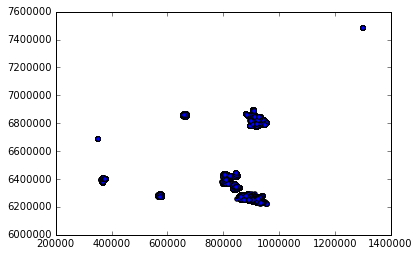

In [90]:

plt.scatter(*(zip(*coords)))

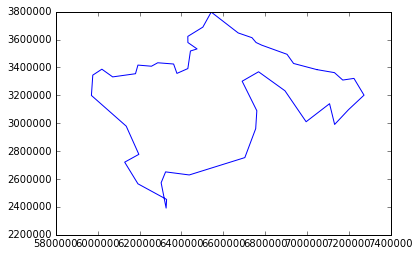

In [91]:
plt.plot(x_fr, y_fr)